In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

In [ ]:
!pip install -q kaggle

In [ ]:
# uploaded = files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey

mental-health-in-tech-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip -q /content/mental-health-in-tech-survey.zip -d .

replace ./survey.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('/content/survey.csv')

In [ ]:
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.shape

(1259, 27)

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df = df.drop(columns = ['state', 'comments'])

In [ ]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
print(df.work_interfere.value_counts())

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [ ]:
# fill in the missing value in the work_interfere column with 'Sometimes' -- appears more often according to the results above

df['work_interfere'] = df['work_interfere'].fillna('Sometimes')
df[df.isna().any(axis=1)]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,2014-08-27 11:31:50,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,2014-08-27 11:32:05,39,M,Canada,NaN,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,2014-08-27 11:32:39,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,2014-08-27 11:32:43,23,Male,Canada,NaN,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [ ]:
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
print(df.self_employed.value_counts())

No     1095
Yes     146
Name: self_employed, dtype: int64


In [ ]:
# fill in the missing value in the self_employed column with 'No' -- appears more often according to the results above

df['self_employed'] = df['self_employed'].fillna('No')
df[df.isna().any(axis=1)]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [ ]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
df.Gender.unique()

print(df.Gender.value_counts())

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [ ]:
male = ['male', 'male', 'm', 'make', 'cis male', 'man', 'msle', 'male leaning androgynous', 'mail', 'malr', 'cis man', 'guy (-ish) ^_^', 'male-ish', 'maile', 'something kinda male?', 'mal', 'male (cis)', 'ostensibly male, unsure what that really means']
female = ['female', 'f', 'woman', 'female (trans)', 'trans woman', 'female (cis)', 'cis-female/femme', 'femail', 'trans-female', 'cis female', 'queer/she/they', 'femake', 'androgyne']

def new_gender(row):
  gender = row["Gender"].lower()
  if gender in female or "fe" in gender:
    return "Female"
  elif gender in male:
    return "Male"

  return gender


In [ ]:
df.Gender = df.apply(lambda row: new_gender(row), axis=1)

In [ ]:
df.Gender.unique()

print(df.Gender.value_counts())

male                                              821
Female                                            253
m                                                 150
make                                                4
male                                                3
cis male                                            3
man                                                 2
msle                                                1
neuter                                              1
mail                                                1
queer                                               1
guy (-ish) ^_^                                      1
a little about you                                  1
malr                                                1
p                                                   1
cis man                                             1
male leaning androgynous                            1
genderqueer                                         1
agender                     

In [ ]:
df.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
df['Age'].replace([df['Age'][df['Age'] < 15]], np.nan, inplace = True)
df['Age'].replace([df['Age'][df['Age'] > 65]], np.nan, inplace = True)

df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61.])

In [ ]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,m,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.0,male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49., 53., 61.])

In [ ]:
df.Country.unique()

print(df.Country.value_counts())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
df = df.drop(columns = ['Timestamp', 'Country'])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,m,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1259 non-null   float64
 1   Gender                     1259 non-null   object 
 2   self_employed              1259 non-null   object 
 3   family_history             1259 non-null   object 
 4   treatment                  1259 non-null   object 
 5   work_interfere             1259 non-null   object 
 6   no_employees               1259 non-null   object 
 7   remote_work                1259 non-null   object 
 8   tech_company               1259 non-null   object 
 9   benefits                   1259 non-null   object 
 10  care_options               1259 non-null   object 
 11  wellness_program           1259 non-null   object 
 12  seek_help                  1259 non-null   object 
 13  anonymity                  1259 non-null   objec

#### Categorical Features

In [ ]:
categorical_features = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'mental_vs_physical','obs_consequence']

                                                Number of samples  Percentage
male                                                          821        65.2
Female                                                        253        20.1
m                                                             150        11.9
make                                                            4         0.3
male                                                            3         0.2
cis male                                                        3         0.2
man                                                             2         0.2
msle                                                            1         0.1
neuter                                                          1         0.1
mail                                                            1         0.1
queer                                                           1         0.1
guy (-ish) ^_^                                                  

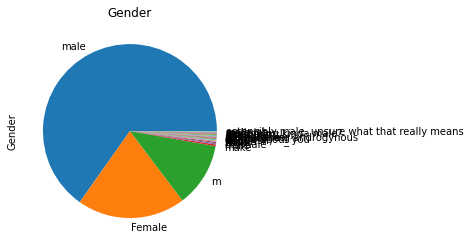

In [ ]:
# Gender column

feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
gender = pd.DataFrame({'Number of samples':count, 'Percentage':percent.round(1)})
print(gender)
count.plot(kind='pie', title=feature);

     Number of samples  Percentage
No                1113        88.4
Yes                146        11.6


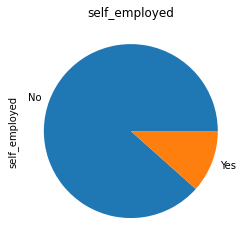

In [ ]:
# self_employed column

feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
se = pd.DataFrame({'Number of samples':count, 'Percentage':percent.round(1)})
print(se)
count.plot(kind='pie', title=feature);

# P

In [ ]:
print("P")

P
